In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\gulim.ttc'
font_name = fm.FontProperties(fname = path).get_name()
print(font_name)
plt.rc('font', family=font_name)

import folium

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Gulim


In [2]:
nonsmoke = pd.read_excel('data/nonsmoke.xlsx', encoding='utf-8')
nonsmoke

,구,실내금연구역,실외금연구역
0,종로구,10375,311
1,중구,11744,736
2,용산구,7738,364
3,성동구,6973,647
4,광진구,9385,597
5,동대문구,9307,545
6,중랑구,6698,504
7,성북구,9534,1004
8,강북구,6806,594
9,도봉구,5924,333


In [3]:
nonsmoke.set_index('구', inplace = True)
nonsmoke

,실내금연구역,실외금연구역
구,,
종로구,10375,311
중구,11744,736
용산구,7738,364
성동구,6973,647
광진구,9385,597
동대문구,9307,545
중랑구,6698,504
성북구,9534,1004
강북구,6806,594


In [4]:
import json
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding = 'utf-8'))

In [8]:
map = folium.Map(location=[37.532869959523794, 127.01591000000003], 
                 zoom_start=11, tiles='Mapbox Control Room')

map.choropleth(geo_data = geo_json,
               data = nonsmoke['실내금연구역'] + nonsmoke['실외금연구역'],
               columns = [nonsmoke.index,nonsmoke['실내금연구역'] + nonsmoke['실외금연구역']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)

map

In [11]:
spot = pd.read_csv('data/smokespot.csv', thousands=',', encoding='cp949')
spot.head()

,금연구역명,금연구역범위상세,시도명,시군구명,금연구역구분,금연구역지정근거명,금연구역면적,위반과태료,위반신고전화번호,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,방어진 휴먼시아 3번 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 방어동 울산광역시 동구 등대4길25,NaN,울산광역시 동구보건소,35.490132,129.428875,2018-06-30,3710000,울산광역시 동구
1,방어진 휴먼시아 1번 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 방어동 울산광역시 동구 등대4길25,NaN,울산광역시 동구보건소,35.490132,129.428875,2018-06-30,3710000,울산광역시 동구
2,방어진 휴먼시아 2번 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 방어동 울산광역시 동구 등대4길25,NaN,울산광역시 동구보건소,35.490132,129.428875,2018-06-30,3710000,울산광역시 동구
3,엠코타운 이스턴베이 102동 놀이터(유아),시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 화정동 울산광역시 동구 화진길 100,NaN,울산광역시 동구보건소,35.492431,129.423557,2018-06-30,3710000,울산광역시 동구
4,엠코타운 이스턴베이 110동 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 화정동 울산광역시 동구 화진길 100,NaN,울산광역시 동구보건소,35.492431,129.423557,2018-06-30,3710000,울산광역시 동구


In [31]:
sspot = spot[spot['시군구명'].str.contains('영등포구')]
sspot = sspot[['시도명','시군구명','위도','경도','소재지도로명주소']] 
sspot.head()
len(sspot)

1047

In [32]:
map = folium.Map(location=[37.532869959523794, 127.01591000000003], 
                 zoom_start=11, tiles='Mapbox Control Room')

map.choropleth(geo_data = geo_json,
               data = nonsmoke['실내금연구역'] + nonsmoke['실외금연구역'],
               columns = [nonsmoke.index,nonsmoke['실내금연구역'] + nonsmoke['실외금연구역']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)
for n in sspot.index:
    folium.CircleMarker(
            location=[sspot['위도'][n], sspot['경도'][n]],
            radius=1,
            color= 'blue',
            fill=True,
            fill_color='blue'
        ).add_to(map)


map



In [42]:
ratio = pd.read_csv('data/ratio.csv', encoding='cp949')
ratio

,구,인구수,흡연률,흡연자수,흡연구역,금연구역
0,종로구,162413,19.8,32158,184,10686
1,중구,136276,25.0,34069,422,12480
2,용산구,245069,18.8,46073,212,8102
3,성동구,312991,20.4,63850,255,7620
4,광진구,369470,22.8,84239,158,9982
5,동대문구,363101,18.8,68263,393,9852
6,중랑구,405639,22.9,92891,248,7202
7,성북구,452292,20.6,93172,231,10538
8,강북구,319377,25.7,82080,350,7400
9,도봉구,339001,21.1,71529,227,6257


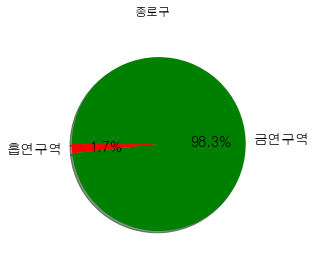

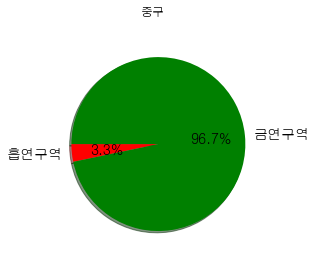

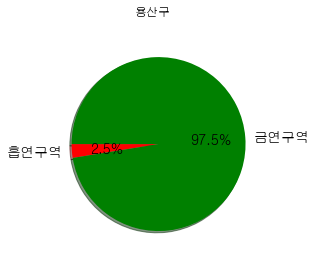

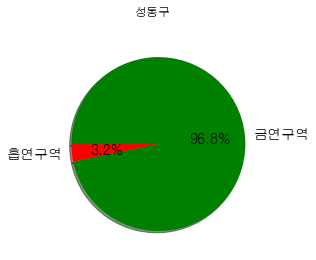

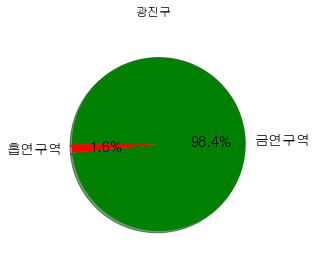

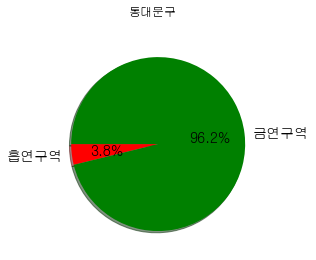

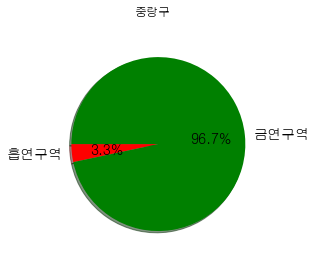

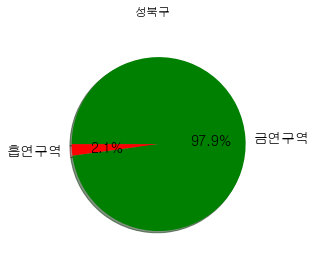

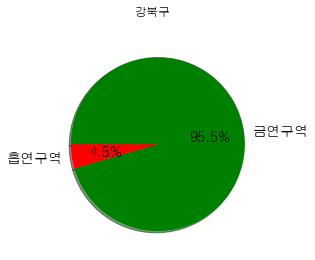

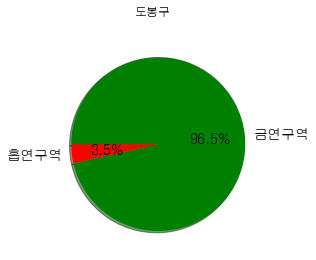

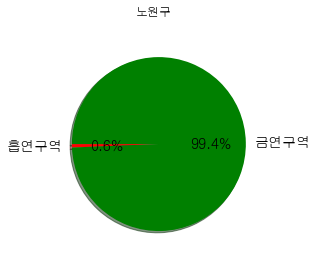

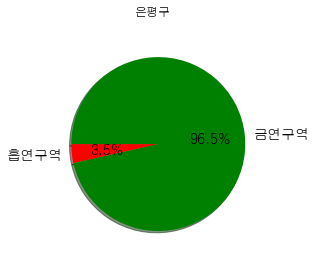

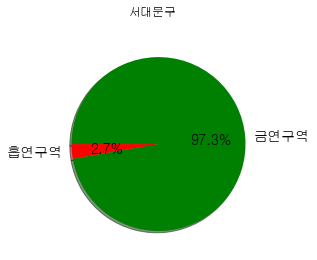

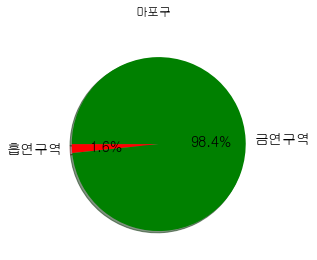

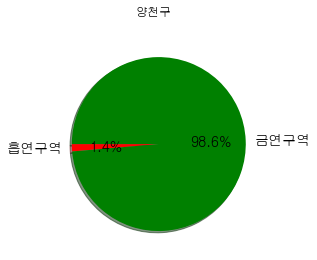

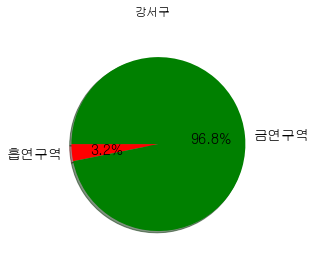

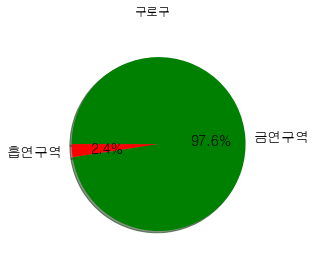

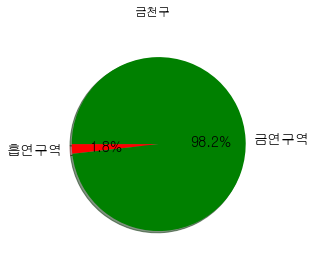

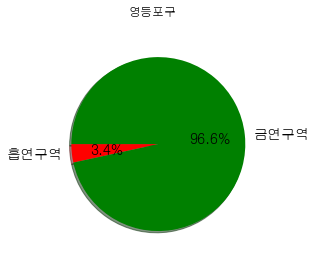

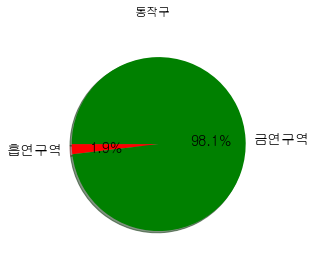

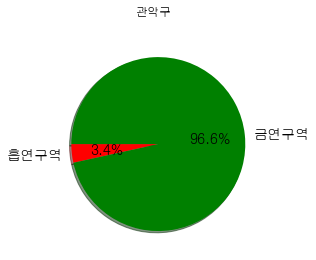

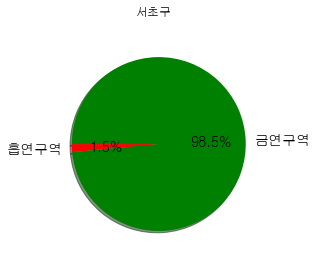

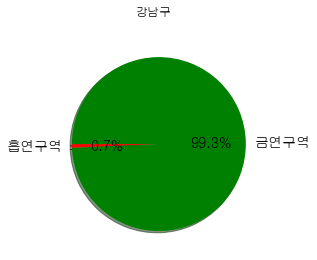

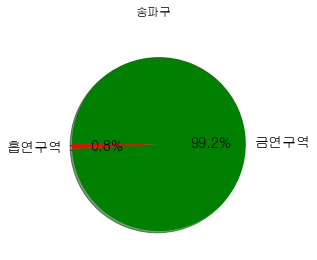

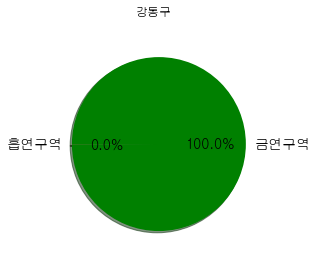

In [48]:
for n in ratio.index :
    labelList = '흡연구역','금연구역'
    sizes = [ratio['흡연구역'][n],ratio['금연구역'][n]]

    colorList=['r','g']
    fig_p1 = plt.figure()
    fig_p1, plt.pie(sizes, labels=labelList, autopct='%.1f%%' ,shadow=True,startangle=180,
                    textprops={'fontsize': 14}, colors=colorList)
    fig_p1, plt.suptitle(ratio['구'][n])
    
    plt.show()

In [26]:
nonsmoke_1 = pd.read_excel('teamproject/전국금연구역표준데이터_1.xls', encoding='utf-8')
nonsmoke_1.head()

,금연구역명,금연구역범위상세,시도명,시군구명,금연구역구분,금연구역지정근거명,금연구역면적,위반과태료,위반신고전화번호,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,방어진 휴먼시아 3번 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 방어동 울산광역시 동구 등대4길25,NaN,울산광역시 동구보건소,35.490132,129.428875,2018-06-30,3710000,울산광역시 동구
1,방어진 휴먼시아 1번 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 방어동 울산광역시 동구 등대4길25,NaN,울산광역시 동구보건소,35.490132,129.428875,2018-06-30,3710000,울산광역시 동구
2,방어진 휴먼시아 2번 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 방어동 울산광역시 동구 등대4길25,NaN,울산광역시 동구보건소,35.490132,129.428875,2018-06-30,3710000,울산광역시 동구
3,엠코타운 이스턴베이 102동 놀이터(유아),시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 화정동 울산광역시 동구 화진길 100,NaN,울산광역시 동구보건소,35.492431,129.423557,2018-06-30,3710000,울산광역시 동구
4,엠코타운 이스턴베이 110동 놀이터,시설전체,울산광역시,동구,어린이놀이시설,국민건강증진법,NaN,100000.0,052-209-4131,울산광역시 동구 화정동 울산광역시 동구 화진길 100,NaN,울산광역시 동구보건소,35.492431,129.423557,2018-06-30,3710000,울산광역시 동구


In [6]:
nonsmoke_2 = pd.read_excel('teamproject/전국금연구역표준데이터_2.xls', encoding='utf-8')
nonsmoke_2.head()

,금연구역명,금연구역범위상세,시도명,시군구명,금연구역구분,금연구역지정근거명,금연구역면적,위반과태료,위반신고전화번호,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,사회복지시설,행복한 실버요양원,경기도,파주시,시설내,국민건강증진법제9조4항,NaN,NaN,031-947-4803,경기도 파주시 광탄면 말구리길 66,NaN,경기도 파주시,37.760141,126.779958,2018-08-29,4060000,경기도 파주시
1,사회복지시설,행복재활요양원,경기도,파주시,시설내,국민건강증진법제9조4항,NaN,NaN,031-959-9966,경기도 파주시 파평면 파산서원길 41,NaN,경기도 파주시,37.760141,126.779958,2018-08-29,4060000,경기도 파주시
2,사회복지시설,한울요양원,경기도,파주시,시설내,국민건강증진법제9조4항,NaN,NaN,031-952-1988,경기도 파주시 월롱면 엘지로360번길 264,NaN,경기도 파주시,37.760141,126.779958,2018-08-29,4060000,경기도 파주시
3,휴게음식점,본스,경기도,파주시,시설내,국민건강증진법제9조4항,NaN,NaN,NaN,경기도 파주시 문발동 510번지 1호 (파주출판산업단지상업시설 1층),경기도 파주시 문발동 510번지 1호 (파주출판산업단지상업시설 1층),경기도 파주시,37.760141,126.779958,2018-08-29,4060000,경기도 파주시
4,휴게음식점,소미식당,경기도,파주시,시설내,국민건강증진법제9조4항,NaN,NaN,NaN,경기도 파주시 당하동 195번지 5호 이마트 지하2층 일부,경기도 파주시 당하동 195번지 5호 이마트 지하2층 일부,경기도 파주시,37.760141,126.779958,2018-08-29,4060000,경기도 파주시


In [30]:
nonsmoke_3 = pd.read_excel('teamproject/전국금연구역표준데이터_3.xls', encoding='utf-8')
nonsmoke_3.head()

,금연구역명,금연구역범위상세,시도명,시군구명,금연구역구분,금연구역지정근거명,금연구역면적,위반과태료,위반신고전화번호,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,(주)유창콘크리트,시설전체,경상남도,사천시,공장,국민건강증진법 제9조,NaN,100000.0,055-831-3571,경상남도 사천시 사천읍 무산로 21,NaN,경상남도 사천시,35.087813,128.088674,2019-03-14,5340000,경상남도 사천시
1,(주)유성정밀,시설전체,경상남도,사천시,공장,국민건강증진법 제9조,NaN,100000.0,055-831-3571,경상남도 사천시 사천읍 무산로 21,NaN,경상남도 사천시,35.087813,128.088674,2019-03-14,5340000,경상남도 사천시
2,(주)유성정공,시설전체,경상남도,사천시,공장,국민건강증진법 제9조,NaN,100000.0,055-831-3571,경상남도 사천시 사천읍 무산로 21,NaN,경상남도 사천시,35.087813,128.088674,2019-03-14,5340000,경상남도 사천시
3,(주)원씨푸드,시설전체,경상남도,사천시,공장,국민건강증진법 제9조,NaN,100000.0,055-831-3571,경상남도 사천시 사천읍 무산로 21,NaN,경상남도 사천시,35.087813,128.088674,2019-03-14,5340000,경상남도 사천시
4,(주)우신냉동,시설전체,경상남도,사천시,공장,국민건강증진법 제9조,NaN,100000.0,055-831-3571,경상남도 사천시 사천읍 무산로 21,NaN,경상남도 사천시,35.087813,128.088674,2019-03-14,5340000,경상남도 사천시


In [27]:
nonsmoke_1 = nonsmoke_1.loc[nonsmoke_1['시도명'].str.startswith('서울')].copy()
nonsmoke_1.shape

(30634, 17)

In [31]:
nonsmoke_3 = nonsmoke_3.loc[nonsmoke_3['시도명'].str.startswith('서울')].copy()
nonsmoke_3.shape

(1186, 17)

In [15]:
nonsmoke_1.isnull().sum()

금연구역명            0
금연구역범위상세         0
시도명              0
시군구명             0
금연구역구분           0
금연구역지정근거명        0
금연구역면적       13565
위반과태료            0
위반신고전화번호         0
소재지도로명주소      4884
소재지지번주소       5167
관리기관명            0
위도               0
경도               0
데이터기준일자          0
제공기관코드           0
제공기관명            0
dtype: int64

In [28]:
nonsmoke_1 = nonsmoke_1[['시도명', '시군구명', '위도', '경도']].copy()
nonsmoke_1.head()

,시도명,시군구명,위도,경도
15547,서울특별시,서초구,37.294438,127.001877
15548,서울특별시,서초구,37.283586,126.590866
15549,서울특별시,서초구,37.285543,127.020933
15550,서울특별시,서초구,37.285356,126.585881
15551,서울특별시,서초구,37.293695,127.003092


In [32]:
nonsmoke_3 = nonsmoke_3[['시도명', '시군구명', '위도', '경도']].copy()
nonsmoke_3.head()

,시도명,시군구명,위도,경도
36081,서울특별시,성동구,37.561086,127.023265
36082,서울특별시,성동구,37.566074,127.045716
36083,서울특별시,성동구,37.572727,127.037154
36084,서울특별시,성동구,37.563158,127.041207
36085,서울특별시,성동구,37.567774,127.038680


In [18]:
nonsmoke_1.set_index('시군구명', inplace=True)
nonsmoke_1.head()

,시도명,위도,경도
시군구명,,,
서초구,서울특별시,37.294438,127.001877
서초구,서울특별시,37.283586,126.590866
서초구,서울특별시,37.285543,127.020933
서초구,서울특별시,37.285356,126.585881
서초구,서울특별시,37.293695,127.003092


In [19]:
nonsmoke_3.set_index('시군구명', inplace=True)
nonsmoke_3.head()

,시도명,위도,경도
시군구명,,,
성동구,서울특별시,37.561086,127.023265
성동구,서울특별시,37.566074,127.045716
성동구,서울특별시,37.572727,127.037154
성동구,서울특별시,37.563158,127.041207
성동구,서울특별시,37.567774,127.038680


In [20]:
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
geo_path = 'data/map/skorea-municipalities-2018-geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [33]:
nonsmoke_3['시군구명'].value_counts()

강남구     857
동대문구    149
성동구     133
성북구      47
Name: 시군구명, dtype: int64

In [29]:
nonsmoke_1['시군구명'].value_counts()

서초구          25146
구로구           5161
종로구            321
서울특별시 도봉구        6
Name: 시군구명, dtype: int64

In [ ]:
map = folium.Map(location=[saddress['위도'].mean(), saddress['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_smoke['부스수'],
               columns = [df_smoke.index, df_smoke['부스수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in saddress.index:
        folium.CircleMarker(
            location=[saddress.loc[n,'위도'], saddress.loc[n, '경도']],
            radius=3,
            color= 'blue',
            fill=True,
            fill_color='white'
        ).add_to(map)


map